In [85]:
import pandas as pd
from statsmodels.tools import categorical

# Load the uploaded dataset
file_path = 'C:\\Users\\FY\\Desktop\\final_merged_dataset.csv'
df = pd.read_csv(file_path)

cleaned_df = df.copy()

# Display the first few rows and basic info
cleaned_df.describe()

,patientunitstayid,age,hospitalid,unitdischargeoffset,has_COPD,has_Diabetes,has_Metastasis,has_Sepsis_A41_9,GCS,vent,has_Vasopressor,WBC x 1000,Hgb,platelets x 1000,total bilirubin,creatinine,albumin,anion gap
count,3.548900e+04,35489.000000,35489.000000,35489.000000,35489.000000,35489.000000,35489.000000,35489.000000,35489.00000,35489.000000,35489.000000,35489.000000,35489.000000,35489.000000,35489.000000,35489.000000,35489.000000,35489.000000
mean,1.694802e+06,63.050833,265.083547,5147.132717,0.019161,0.011384,0.001606,0.023754,12.22931,0.314830,0.054101,11.506078,10.999848,213.402350,17.565375,130.905190,3.054420,10.469145
std,9.188816e+05,16.883981,104.248469,6696.283487,0.137092,0.106087,0.040045,0.152283,4.06568,0.464455,0.226221,8.329026,2.439090,108.588589,38.109874,142.525403,0.756589,4.829969
min,2.420820e+05,1.000000,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.00000,0.000000,0.000000,0.000000,2.700000,1.000000,0.000000,8.840000,0.100000,-5.000000
25%,9.210870e+05,53.000000,176.000000,1583.000000,0.000000,0.000000,0.000000,0.000000,10.00000,0.000000,0.000000,7.300000,9.100000,143.000000,6.840000,61.880000,2.500000,7.000000
50%,1.583018e+06,65.000000,252.000000,2937.000000,0.000000,0.000000,0.000000,0.000000,14.00000,0.000000,0.000000,10.000000,10.800000,199.000000,10.260000,84.864000,3.100000,10.000000
75%,2.421502e+06,76.000000,338.000000,5750.000000,0.000000,0.000000,0.000000,0.000000,15.00000,1.000000,0.000000,13.700000,12.700000,265.000000,15.390000,132.600000,3.600000,13.000000
max,3.353254e+06,90.000000,459.000000,128140.000000,1.000000,1.000000,1.000000,1.000000,15.00000,1.000000,1.000000,446.000000,22.300000,2036.000000,1072.170000,2422.160000,7.400000,51.000000


In [86]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35489 entries, 0 to 35488
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patientunitstayid    35489 non-null  int64  
 1   gender               35489 non-null  object 
 2   age                  35489 non-null  int64  
 3   ethnicity            35489 non-null  object 
 4   hospitalid           35489 non-null  int64  
 5   admission_type       35489 non-null  object 
 6   unitdischargestatus  35489 non-null  object 
 7   unitdischargeoffset  35489 non-null  int64  
 8   has_COPD             35489 non-null  float64
 9   has_Diabetes         35489 non-null  float64
 10  has_Metastasis       35489 non-null  float64
 11  has_Sepsis_A41_9     35489 non-null  float64
 12  GCS                  35489 non-null  float64
 13  vent                 35489 non-null  float64
 14  has_Vasopressor      35489 non-null  float64
 15  WBC x 1000           35489 non-null 

In [87]:
cleaned_df.head()

,patientunitstayid,gender,age,ethnicity,hospitalid,admission_type,unitdischargestatus,unitdischargeoffset,has_COPD,has_Diabetes,...,GCS,vent,has_Vasopressor,WBC x 1000,Hgb,platelets x 1000,total bilirubin,creatinine,albumin,anion gap
0,242082,Male,75,Caucasian,108,Emergency,Alive,2752,0.0,0.0,...,15.0,0.0,0.0,7.18,13.1,169.0,20.52,69.836,4.1,11.0
1,242083,Female,90,Caucasian,92,Emergency,Alive,1546,0.0,0.0,...,15.0,0.0,0.0,10.00,14.7,213.0,15.39,71.604,4.2,18.0
2,242154,Female,46,Caucasian,79,Elective,Alive,8792,0.0,0.0,...,7.0,1.0,0.0,21.30,10.5,450.0,3.42,35.360,2.8,8.0
3,242290,Female,75,Other/Unknown,79,Elective,Alive,1656,0.0,0.0,...,15.0,0.0,0.0,12.40,11.1,239.0,6.84,141.440,2.6,9.0
4,242319,Male,61,Caucasian,79,Elective,Alive,1856,0.0,0.0,...,15.0,0.0,0.0,9.10,9.1,149.0,6.84,150.280,2.6,9.0


In [88]:
cleaned_df["has_Vasopressor"].value_counts()


0.0    33569
1.0     1920
Name: has_Vasopressor, dtype: int64

In [89]:
cleaned_df.drop(["patientunitstayid"], inplace=True, axis=1)
cleaned_df.drop(["hospitalid"], inplace=True, axis=1)

In [90]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35489 entries, 0 to 35488
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               35489 non-null  object 
 1   age                  35489 non-null  int64  
 2   ethnicity            35489 non-null  object 
 3   admission_type       35489 non-null  object 
 4   unitdischargestatus  35489 non-null  object 
 5   unitdischargeoffset  35489 non-null  int64  
 6   has_COPD             35489 non-null  float64
 7   has_Diabetes         35489 non-null  float64
 8   has_Metastasis       35489 non-null  float64
 9   has_Sepsis_A41_9     35489 non-null  float64
 10  GCS                  35489 non-null  float64
 11  vent                 35489 non-null  float64
 12  has_Vasopressor      35489 non-null  float64
 13  WBC x 1000           35489 non-null  float64
 14  Hgb                  35489 non-null  float64
 15  platelets x 1000     35489 non-null 

In [91]:
categorical_name = ["gender",
                    "ethnicity",
                    "admission_type",
                    "has_Vasopressor",
                    "has_COPD",
                    "has_Diabetes",
                    "has_Metastasis",
                    "has_Sepsis_A41_9"]

for name in categorical_name:
    cleaned_df[name] = cleaned_df[name].astype("category")


In [92]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35489 entries, 0 to 35488
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               35489 non-null  category
 1   age                  35489 non-null  int64   
 2   ethnicity            35489 non-null  category
 3   admission_type       35489 non-null  category
 4   unitdischargestatus  35489 non-null  object  
 5   unitdischargeoffset  35489 non-null  int64   
 6   has_COPD             35489 non-null  category
 7   has_Diabetes         35489 non-null  category
 8   has_Metastasis       35489 non-null  category
 9   has_Sepsis_A41_9     35489 non-null  category
 10  GCS                  35489 non-null  float64 
 11  vent                 35489 non-null  float64 
 12  has_Vasopressor      35489 non-null  category
 13  WBC x 1000           35489 non-null  float64 
 14  Hgb                  35489 non-null  float64 
 15  platelets x 1000   

In [93]:
time = cleaned_df["unitdischargeoffset"]
cleaned_df.drop(["unitdischargeoffset"], inplace=True, axis=1)

event = (cleaned_df['unitdischargestatus'] == 'Expired').astype(int)
cleaned_df.drop(["unitdischargestatus"], inplace=True, axis=1)

In [94]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35489 entries, 0 to 35488
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            35489 non-null  category
 1   age               35489 non-null  int64   
 2   ethnicity         35489 non-null  category
 3   admission_type    35489 non-null  category
 4   has_COPD          35489 non-null  category
 5   has_Diabetes      35489 non-null  category
 6   has_Metastasis    35489 non-null  category
 7   has_Sepsis_A41_9  35489 non-null  category
 8   GCS               35489 non-null  float64 
 9   vent              35489 non-null  float64 
 10  has_Vasopressor   35489 non-null  category
 11  WBC x 1000        35489 non-null  float64 
 12  Hgb               35489 non-null  float64 
 13  platelets x 1000  35489 non-null  float64 
 14  total bilirubin   35489 non-null  float64 
 15  creatinine        35489 non-null  float64 
 16  albumin           3548

In [95]:
event.value_counts()

0    32900
1     2589
Name: unitdischargestatus, dtype: int64

In [96]:
numerical_name = cleaned_df.columns.drop(categorical_name)
numerical_name

Index(['age', 'GCS', 'vent', 'WBC x 1000', 'Hgb', 'platelets x 1000',
       'total bilirubin', 'creatinine', 'albumin', 'anion gap'],
      dtype='object')

# Data

In [105]:
import pandas as pd
import statsmodels.api as sm

x = cleaned_df.copy()
y = event


In [106]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_name),        # normalize numeric
        ('cat', OneHotEncoder(drop='first'), categorical_name)  # encode categorical
    ]
)

X_processed = preprocessor.fit_transform(x)

In [107]:
# Get feature names
num_features = numerical_name
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_name)

import numpy as np
df_transformed = pd.DataFrame(
    X_processed,
    columns=np.concatenate([num_features, cat_features])
)

df_transformed

,age,GCS,vent,WBC x 1000,Hgb,platelets x 1000,total bilirubin,creatinine,albumin,anion gap,...,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,admission_type_Emergency,has_Vasopressor_1.0,has_COPD_1.0,has_Diabetes_1.0,has_Metastasis_1.0,has_Sepsis_A41_9_1.0
0,0.707732,0.681492,-0.677858,-0.519405,0.861052,-0.408910,0.077530,-0.428485,1.381986,0.109910,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.596161,0.681492,-0.677858,-0.180825,1.517043,-0.003705,-0.057082,-0.416080,1.514160,1.559215,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-1.009896,-1.286226,1.475235,1.175895,-0.204935,2.178875,-0.371179,-0.670383,-0.336277,-0.511221,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.707732,0.681492,-0.677858,0.107328,0.041062,0.235734,-0.281437,0.073916,-0.600625,-0.304177,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.121468,0.681492,-0.677858,-0.288883,-0.778928,-0.593094,-0.281437,0.135941,-0.600625,-0.304177,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35484,-0.772982,-1.286226,1.475235,-0.480985,-1.106924,0.548847,-0.371179,-0.465700,-0.336277,-1.339395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35485,0.944646,-3.745874,1.475235,0.119334,-0.409932,-0.372073,-0.281437,2.108333,-0.071929,-0.925308,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35486,0.944646,0.435527,-0.677858,-0.348915,0.697054,-0.620722,-0.146824,-0.254816,0.588942,0.316954,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35487,0.589275,-2.270085,1.475235,1.199908,-0.368933,0.152851,-0.281437,1.550109,-0.071929,-0.097134,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [110]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_transformed, y, stratify=y, test_size=0.3, random_state=42)

# logistic regression

In [111]:
con_train_x = sm.add_constant(X_train)

In [113]:
model = sm.Logit(y_train, con_train_x)
results = model.fit(method="bfgs", maxiter=200)
results.summary()

Optimization terminated successfully.
         Current function value: 0.199478
         Iterations: 157
         Function evaluations: 158
         Gradient evaluations: 158


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     unitdischargestatus   No. Observations:                24842
Model:                           Logit   Df Residuals:                    24818
Method:                            MLE   Df Model:                           23
Date:                 Wed, 02 Jul 2025   Pseudo R-squ.:                  0.2362
Time:                         09:49:45   Log-Likelihood:                -4955.4
converged:                        True   LL-Null:                       -6488.3
Covariance Type:             nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.3312      0.111    -30.136      0.000      -3.548      -3.115
age                           0.3518      0.032     11.165      0.000       0.290       0.414
GCS                          -0.5223      0.025    -20.886      0.000      -0.571      -0.473
vent                          0.3196      0.029     11.020      0.000       0.263       0.376
WBC x 1000                    0.2808      0.025     11.085      0.000       0.231       0.330
Hgb                           0.0260      0.031      0.850      0.395      -0.034       0.086
platelets x 1000             -0.2568      0.030     -8.671      0.000      -0.315      -0.199
total bilirubin               0.1396      0.018      7.779      0.000       0.104       0.175
creatinine                    0.0658      0.025      2.595      0.009       0.016       0.115
albumin                      -0.5292      0.031    -17.047      0.000      -0.590      -0.468
anion gap                     0.5132      0.025     20.602      0.000       0.464       0.562
gender_Male                  -0.0960      0.056     -1.723      0.085      -0.205       0.013
gender_Unknown               -0.0171      6.212     -0.003      0.998     -12.192      12.157
ethnicity_Asian               0.0077      0.255      0.030      0.976      -0.493       0.508
ethnicity_Caucasian           0.1445      0.102      1.416      0.157      -0.056       0.345
ethnicity_Hispanic           -0.2062      0.238     -0.868      0.385      -0.672       0.259
ethnicity_Native American    -0.2530      0.275     -0.921      0.357      -0.792       0.286
ethnicity_Other/Unknown      -0.0733      0.163     -0.450      0.653      -0.392       0.246
admission_type_Emergency     -0.0877      0.056     -1.578      0.115      -0.197       0.021
has_Vasopressor_1.0           0.9385      0.085     11.003      0.000       0.771       1.106
has_COPD_1.0                  0.0412      0.214      0.193      0.847      -0.378       0.460
has_Diabetes_1.0              0.2900      0.285      1.019      0.308      -0.268       0.848
has_Metastasis_1.0            0.4235      0.657      0.645      0.519      -0.863       1.711
has_Sepsis_A41_9_1.0          0.2891      0.146      1.974      0.048       0.002       0.576
=============================================================================================
"""

In [118]:
X_train.shape, X_test.shape

((24842, 23), (10647, 23))

In [125]:
from sklearn.metrics import classification_report, roc_auc_score
# evaluate mode
con_test_x = sm.add_constant(X_test)
y_prob = results.predict(con_test_x)
y_prob

25362    0.014478
15082    0.028297
35018    0.014210
33662    0.011899
10392    0.041562
           ...   
21558    0.023054
14850    0.019369
3866     0.007331
19952    0.062898
18000    0.010613
Length: 10647, dtype: float64

In [126]:
odds_ratios = pd.Series(np.exp(results.params), index=results.params.index)
print("Odds Ratios:")
print(odds_ratios)

Odds Ratios:
const                        0.035752
age                          1.421607
GCS                          0.593165
vent                         1.376635
WBC x 1000                   1.324137
Hgb                          1.026388
platelets x 1000             0.773510
total bilirubin              1.149766
creatinine                   1.067997
albumin                      0.589064
anion gap                    1.670669
gender_Male                  0.908483
gender_Unknown               0.983013
ethnicity_Asian              1.007739
ethnicity_Caucasian          1.155466
ethnicity_Hispanic           0.813689
ethnicity_Native American    0.776442
ethnicity_Other/Unknown      0.929362
admission_type_Emergency     0.916049
has_Vasopressor_1.0          2.556075
has_COPD_1.0                 1.042083
has_Diabetes_1.0             1.336378
has_Metastasis_1.0           1.527329
has_Sepsis_A41_9_1.0         1.335190
dtype: float64


## Cox model


In [127]:
from lifelines import CoxPHFitter

df_cox = X_train.copy()
df_cox["time"] = time
df_cox["event"] = event

cph = CoxPHFitter()
cph.fit(df_cox, duration_col="time", event_col="event")
cph.print_summary()

D:\anaconda3\envs\FLCausalMixture\lib\site-packages\lifelines\utils\__init__.py:1103: ConvergenceWarning: Column(s) ['gender_Unknown'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
D:\anaconda3\envs\FLCausalMixture\lib\site-packages\lifelines\utils\__init__.py:997: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  nonnumeric_cols = [col for (col, dtype) in df.dtypes.iteritems() if dtype.name == "category" or dtype.kind not in "biuf"]
D:\anaconda3\envs\FLCausalMixture\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instea

<lifelines.CoxPHFitter: fitted with 24842 total observations, 23030 right-censored observations>
             duration col = 'time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 24842
number of events observed = 1812
   partial log-likelihood = -15061.74
         time fit was run = 2025-07-02 14:06:26 UTC

---
                            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                         
age                         0.35       1.41       0.03             0.29             0.40                 1.34                 1.50
GCS                        -0.31       0.74       0.02            -0.35            -0.26                 0.71                 0.77
vent                        0.11       1.12       0.03             0.06             0.16                 1.06                 1.18
WBC x 1000                  0.15       1.16       0.01             0.13             0.17                 1.14                 1.18
Hgb                         0.18       1.19       0.03             0.12             0.23                 1.13                 1.26
platelets x 1000           -0.24       0.79       0.03            -0.29            -0.19                 0.75                 0.83
total bilirubin             0.02       1.02       0.01            -0.01             0.04                 0.99                 1.04
creatinine                  0.07       1.08       0.02             0.03             0.11                 1.03                 1.12
albumin                    -0.32       0.73       0.03            -0.37            -0.26                 0.69                 0.77
anion gap                   0.44       1.55       0.02             0.41             0.47                 1.50                 1.60
gender_Male                -0.15       0.86       0.05            -0.24            -0.05                 0.78                 0.95
gender_Unknown            -12.42       0.00    1919.17         -3773.92          3749.07                 0.00                  inf
ethnicity_Asian             0.24       1.27       0.23            -0.21             0.68                 0.81                 1.97
ethnicity_Caucasian         0.29       1.34       0.09             0.12             0.47                 1.13                 1.60
ethnicity_Hispanic         -0.07       0.93       0.21            -0.48             0.34                 0.62                 1.41
ethnicity_Native American   0.34       1.40       0.24            -0.12             0.80                 0.88                 2.23
ethnicity_Other/Unknown     0.08       1.09       0.14            -0.19             0.36                 0.82                 1.43
admission_type_Emergency    0.02       1.02       0.05            -0.07             0.12                 0.93                 1.12
has_Vasopressor_1.0         0.64       1.89       0.07             0.50             0.77                 1.66                 2.16
has_COPD_1.0               -0.05       0.95       0.20            -0.44             0.34                 0.64                 1.40
has_Diabetes_1.0            0.33       1.39       0.26            -0.18             0.84                 0.83                 2.31
has_Metastasis_1.0          0.75       2.12       0.58            -0.38             1.88                 0.68                 6.58
has_Sepsis_A41_9_1.0        0.33       1.39       0.12             0.09             0.57                 1.10                 1.77

                               z      p   -log2(p)
covariate                                         
age                        12.14 <0.005     110.25
GCS                       -14.29 <0.005     151.54
vent                        4.36 <0.005      16.25
WBC x 1000                 15.23 <0.005     171.69
Hgb                         6.70 <0.005      35.45
p

<Axes: xlabel='log(HR) (95% CI)'>

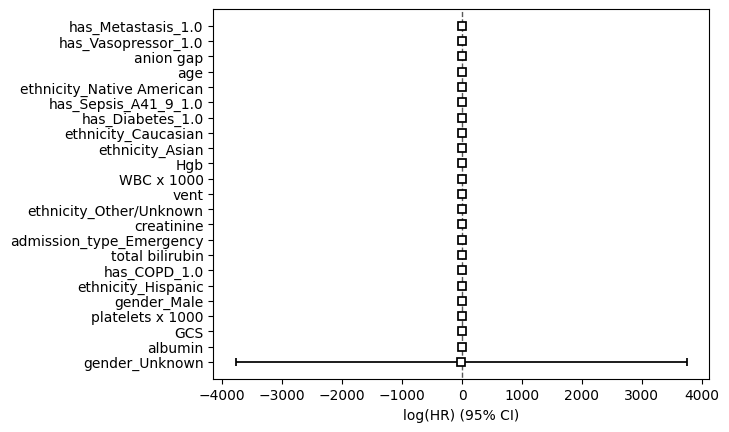

In [128]:
cph.plot()


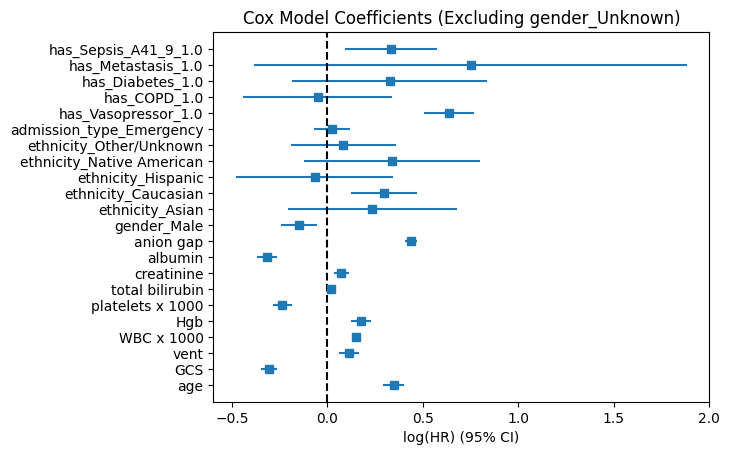

In [129]:
import matplotlib.pyplot as plt

# Get summary as DataFrame
summary_df = cph.summary

# Remove the row for gender_Unknown
plot_df = summary_df.drop(index="gender_Unknown")

# Plot manually
plt.errorbar(
    x=plot_df["coef"],
    y=plot_df.index,
    xerr=1.96 * plot_df["se(coef)"],
    fmt="s"
)
plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel("log(HR) (95% CI)")
plt.title("Cox Model Coefficients (Excluding gender_Unknown)")
plt.show()
